In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv('loan_prediction.csv')


In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Comments
--
The file has 614 rows and 13 columns. Now we shall check for null entries.


In [69]:
df.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

Comments
--
as we can see there are a few null entries in our data set so we are going to fill these values with the mode value


In [70]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [71]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Comments
--
As we can see that there are no null values left now so we can go forward


In [72]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Comments
--
- As we can see applicant income and coapplicant income columns have highers standard deviation than the respective mean values which implies skewness in both columns
- the max values suggest pooibilities of outliers 
    

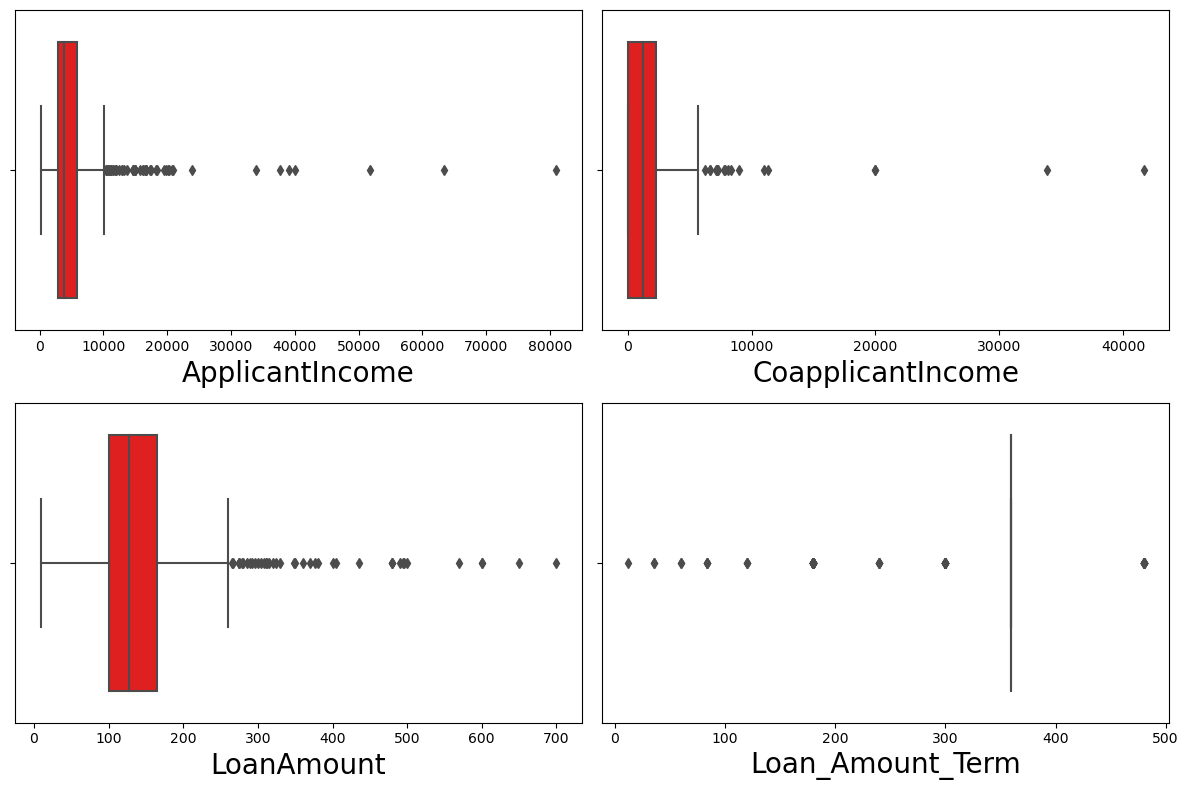

In [73]:
plt.figure(figsize=(12,8))
plotnumber=1
Num=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for column in Num:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Comments
--
- Box plot confirms the presence of outliers



Encoding categorical data 
--


In [74]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


Dropping unnencessary data
--
- Since Loan_ID has no real signinficance to our model so we need to drop this column to make our data more meaningful.
- also remapping dependent column to numeric data since it still has object kind data ie. 3+

In [75]:
df.drop(["Loan_ID"], axis=1, inplace=True)
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'] =pd.to_numeric(df['Dependents'])

Removing outliers using zscore method
--

In [76]:
from scipy.stats import zscore
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("dataframe before removing outliers: ", df.shape)
print ("dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() 

dataframe before removing outliers:  (614, 12)
dataframe after removing outliers:  (577, 12)
Percentage of data loss:  6.026058631921824


Checking relation of diffent features with our target variable
--

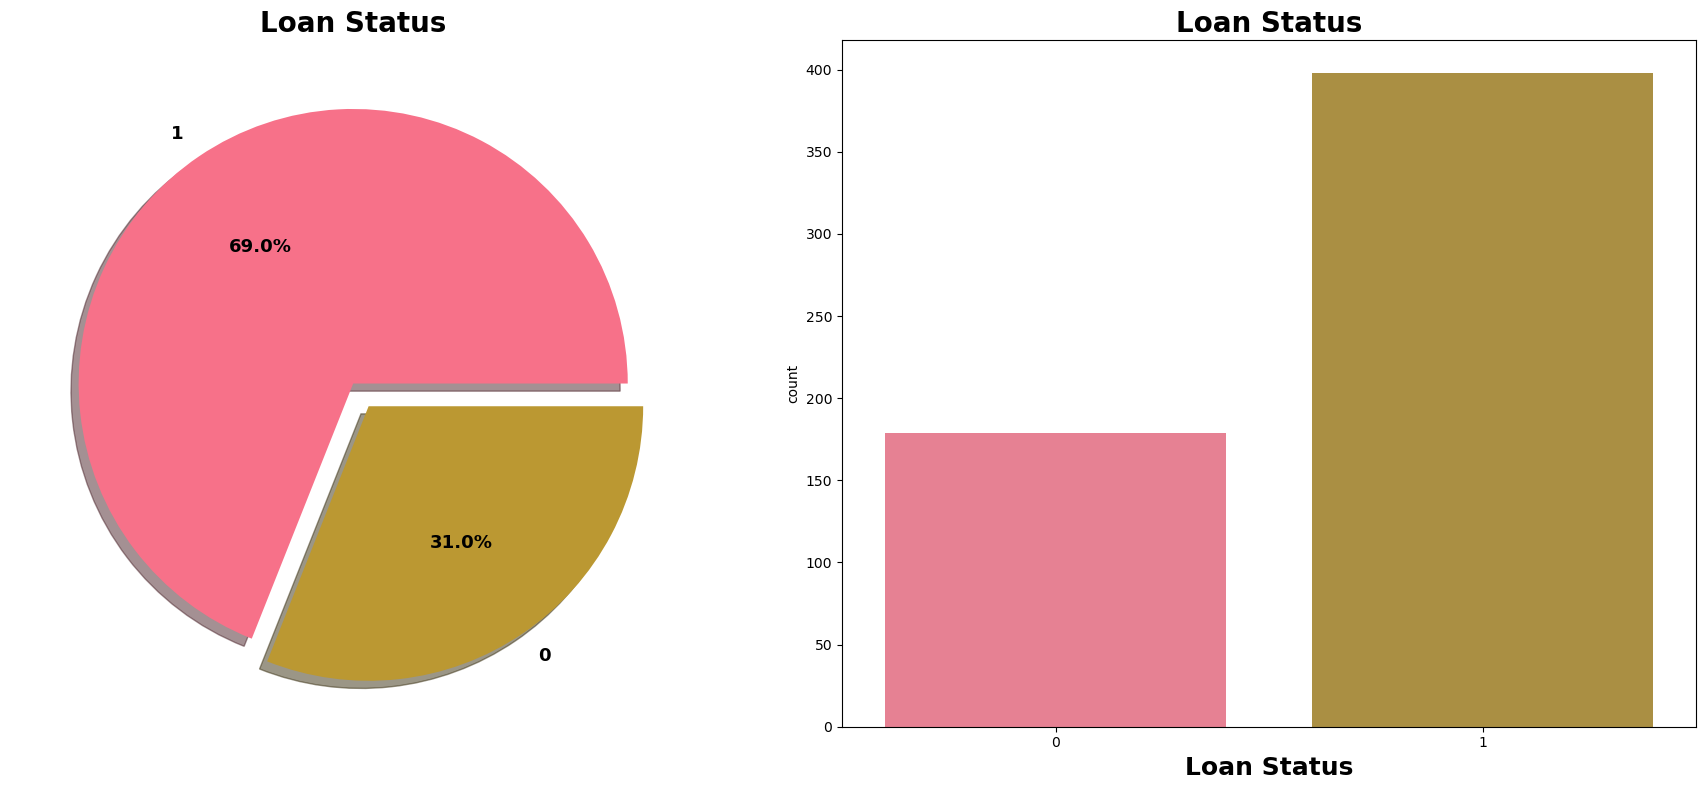

In [78]:

plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()


70% of the applicants get loan approval which is a fairly skewed data in nature.


Relation between gender and Loan status
--


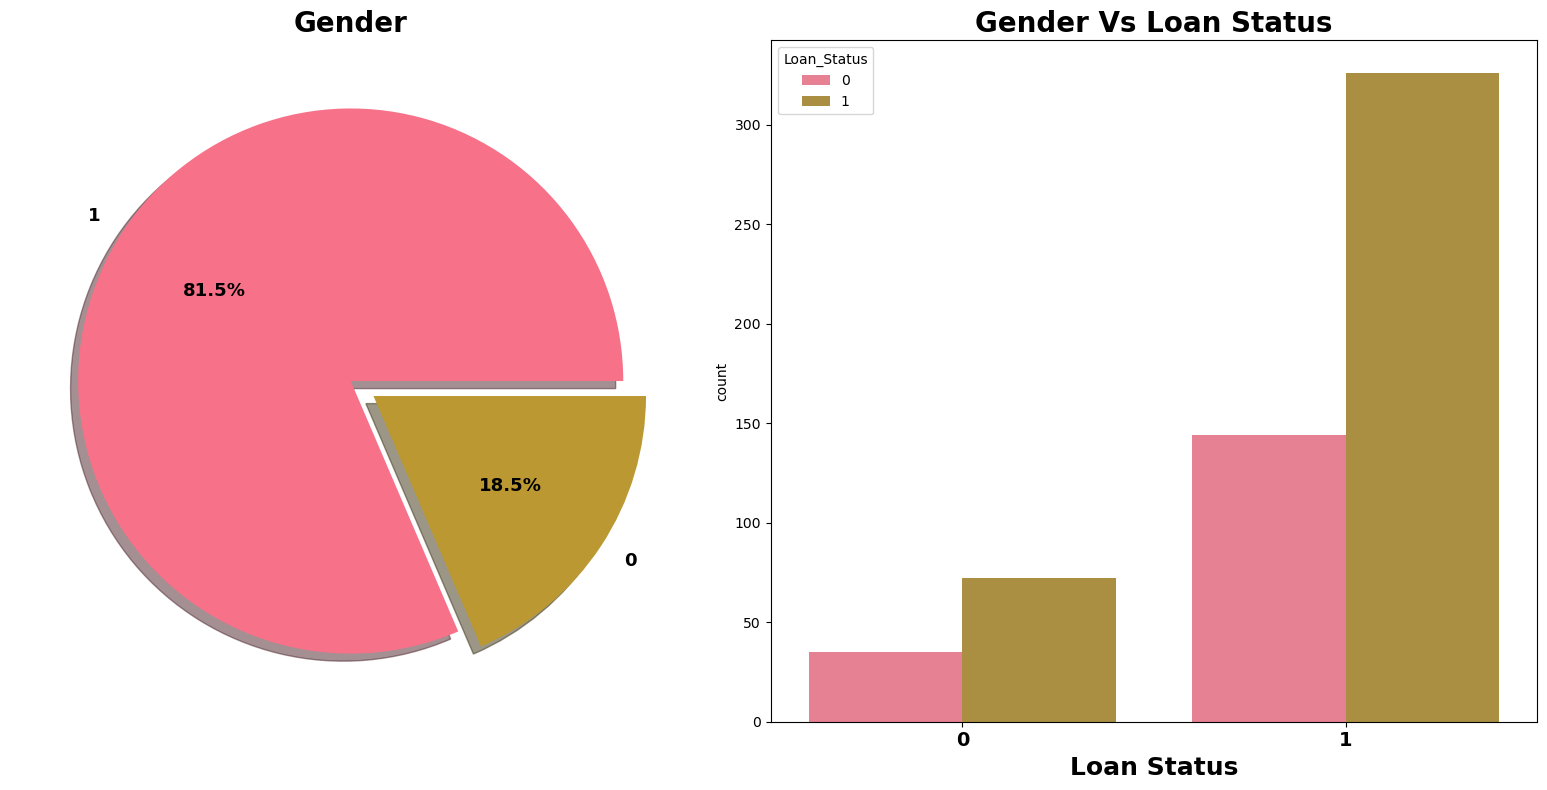

In [79]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()



81.5% of total loan reciepients are men applicants so it could mean men are more likely to get loan approval than female applicants but it can also mean that there are more men applicants than female applicants.
so we need to check the numbers of total application and approval from both male and felamle candidates




In [82]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,0,1,All
Gender,,,
0,35,72,107
1,144,326,470
All,179,398,577


- As we can see that 72/107 ie 67% of women get loan approval
- 326/470 ie 69% male getg loan approval which is a similar no. so we can conclude that the gender is not making any differnce



loan status vs married
--


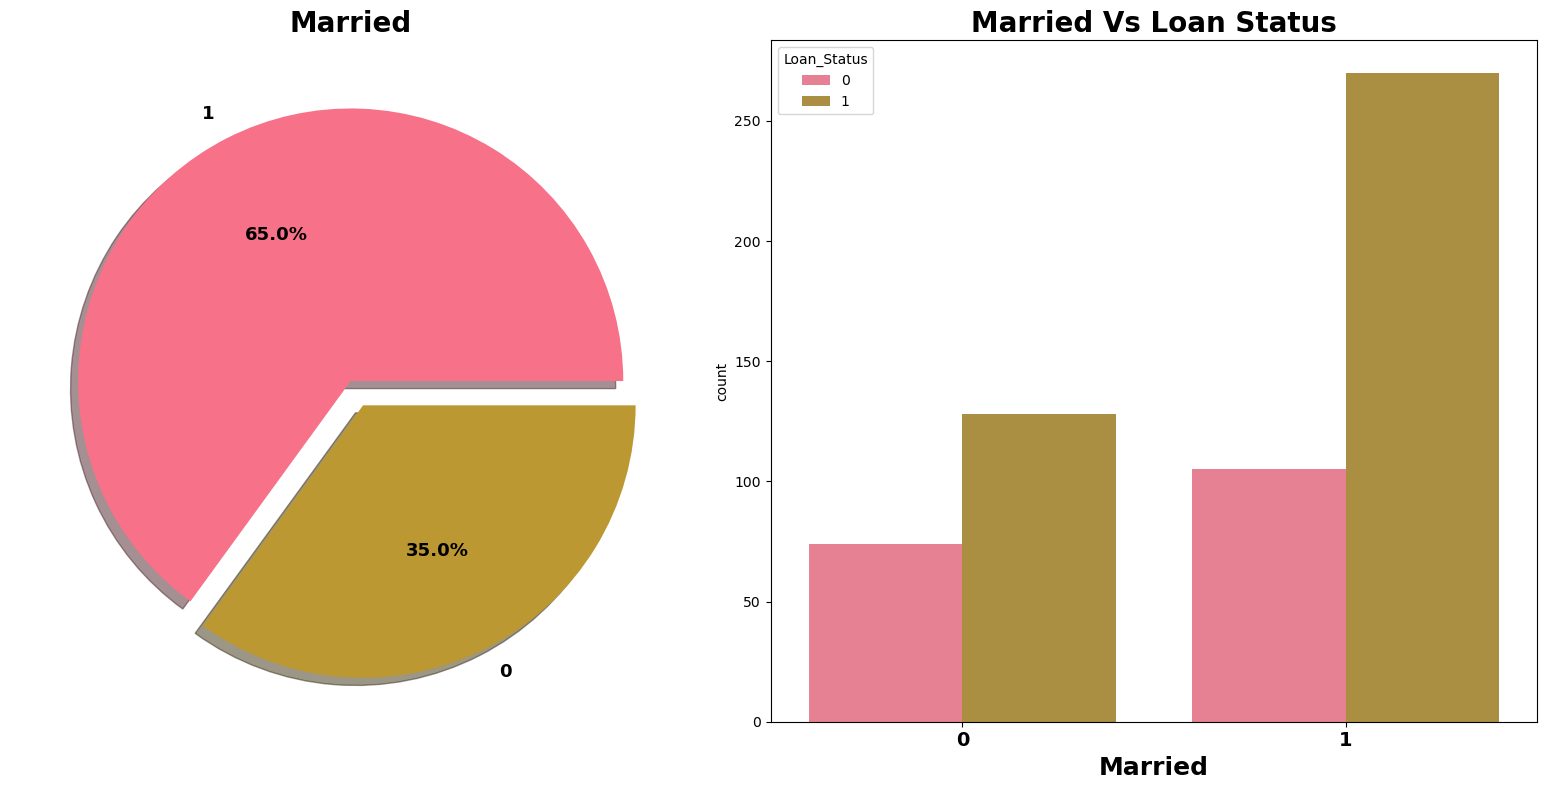

In [83]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


In [86]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')


- 65% married applicants get loan approval. 
- more unmarried women get loan aprroval and more married men get loan approval 


number of dependents vs loan status
--


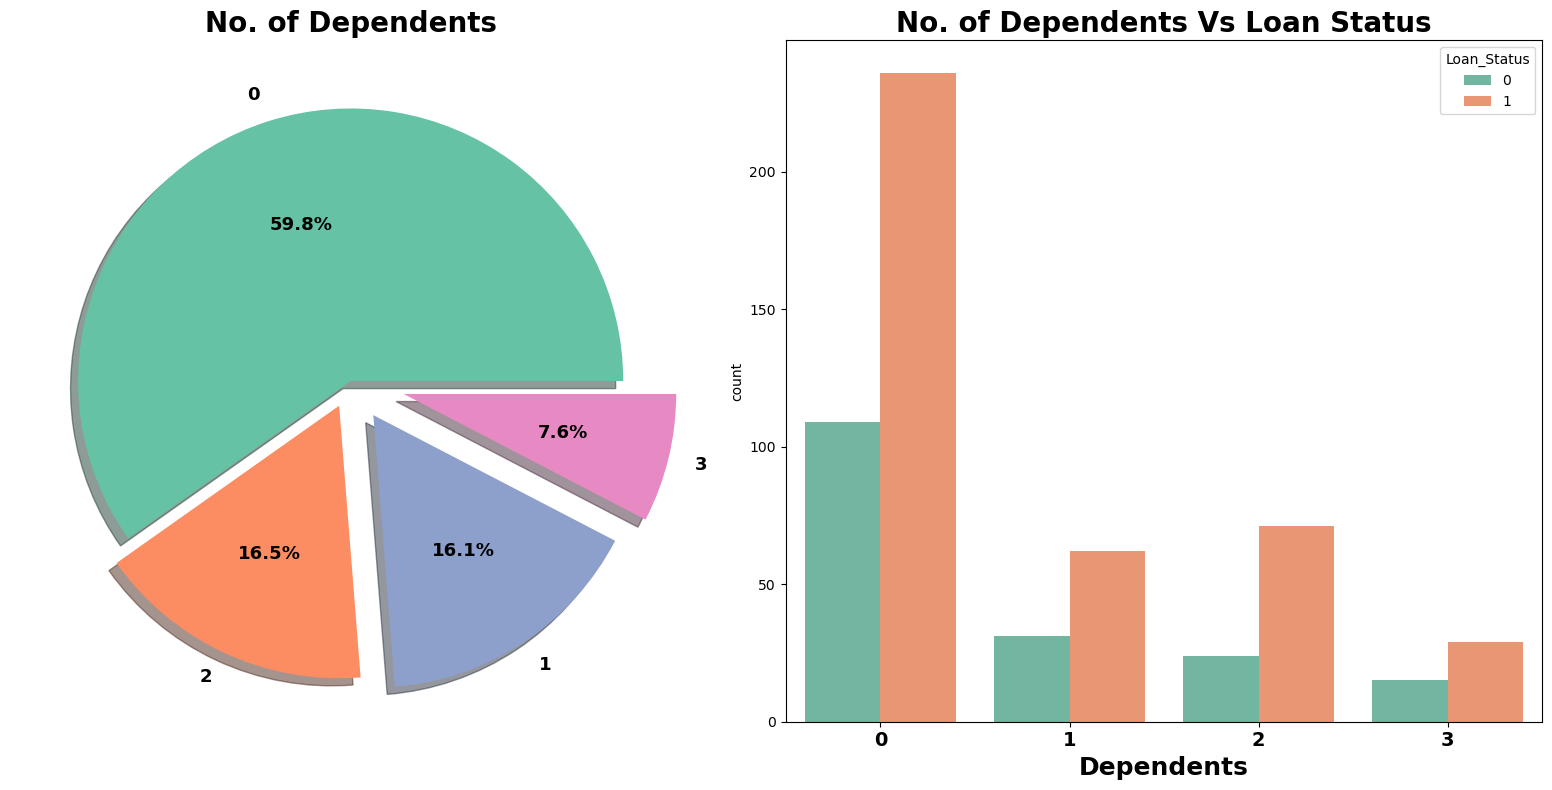

In [88]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


     

In [89]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')


Comment:
--

- 58% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents. 
- Female having zero dependents have more chances to get loan approval compare to Females with dependents.
- For male Maximum loan approval comes with 0 dependents followed by 2 dependents.



Education vs Loan Status
--



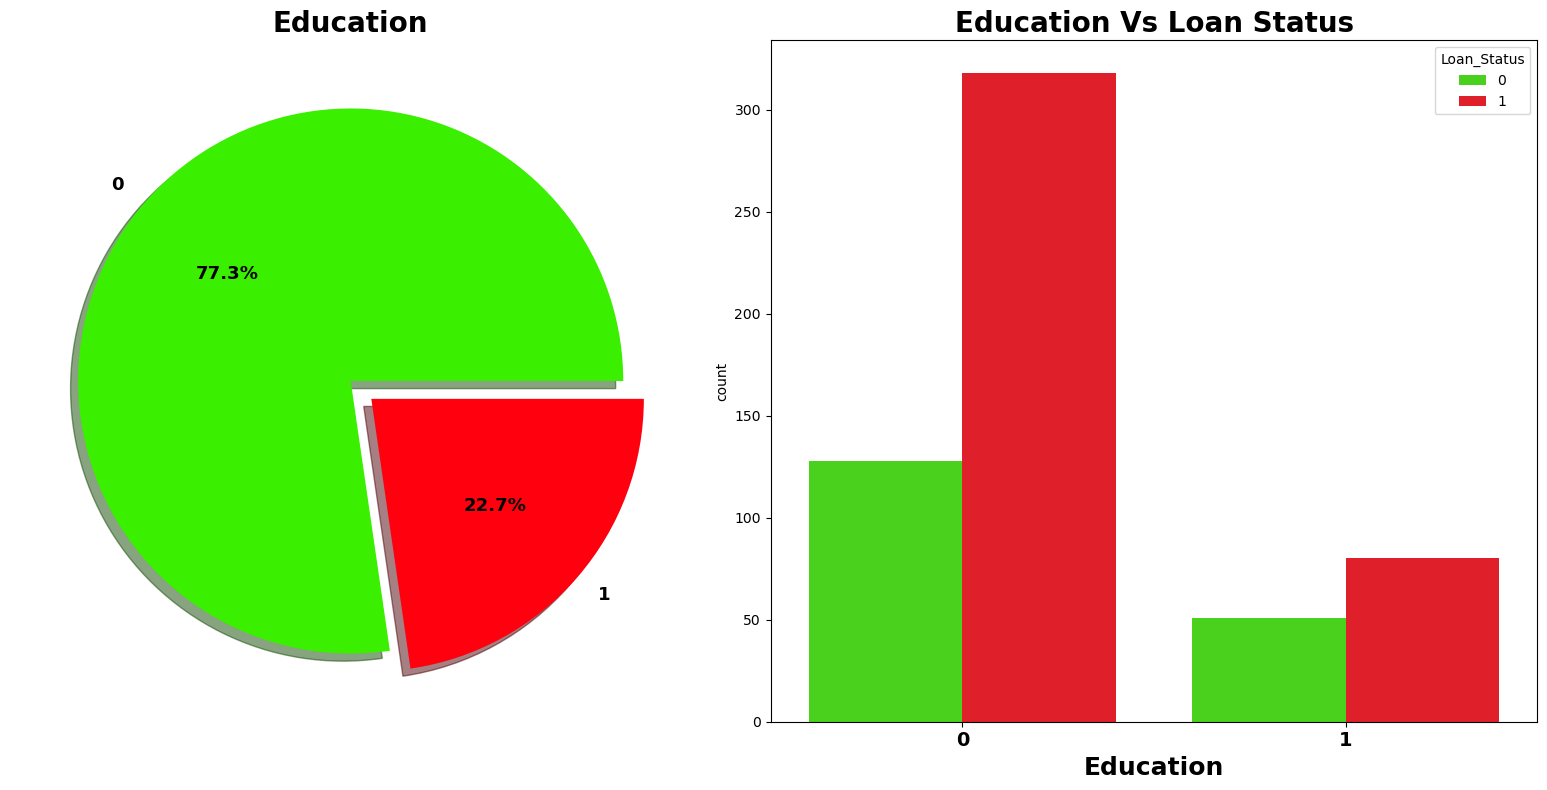

In [90]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [91]:
  pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

Graduation helps heavily in getting loan approval 



Checking Data distribution
--


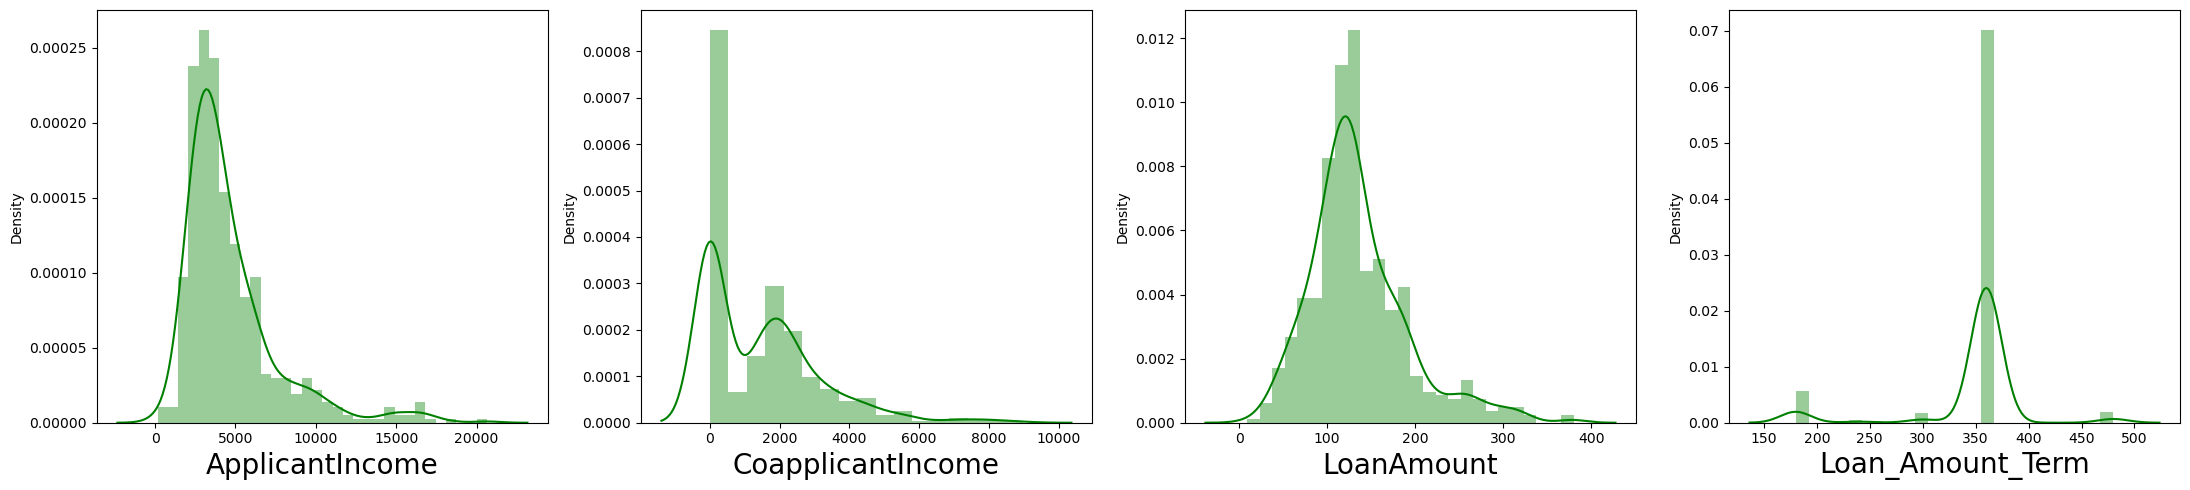

In [93]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Num:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


- As we pointed out earlier the data is skewed


In [96]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

-'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature


In [97]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()


,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


collinearity heatmap
--



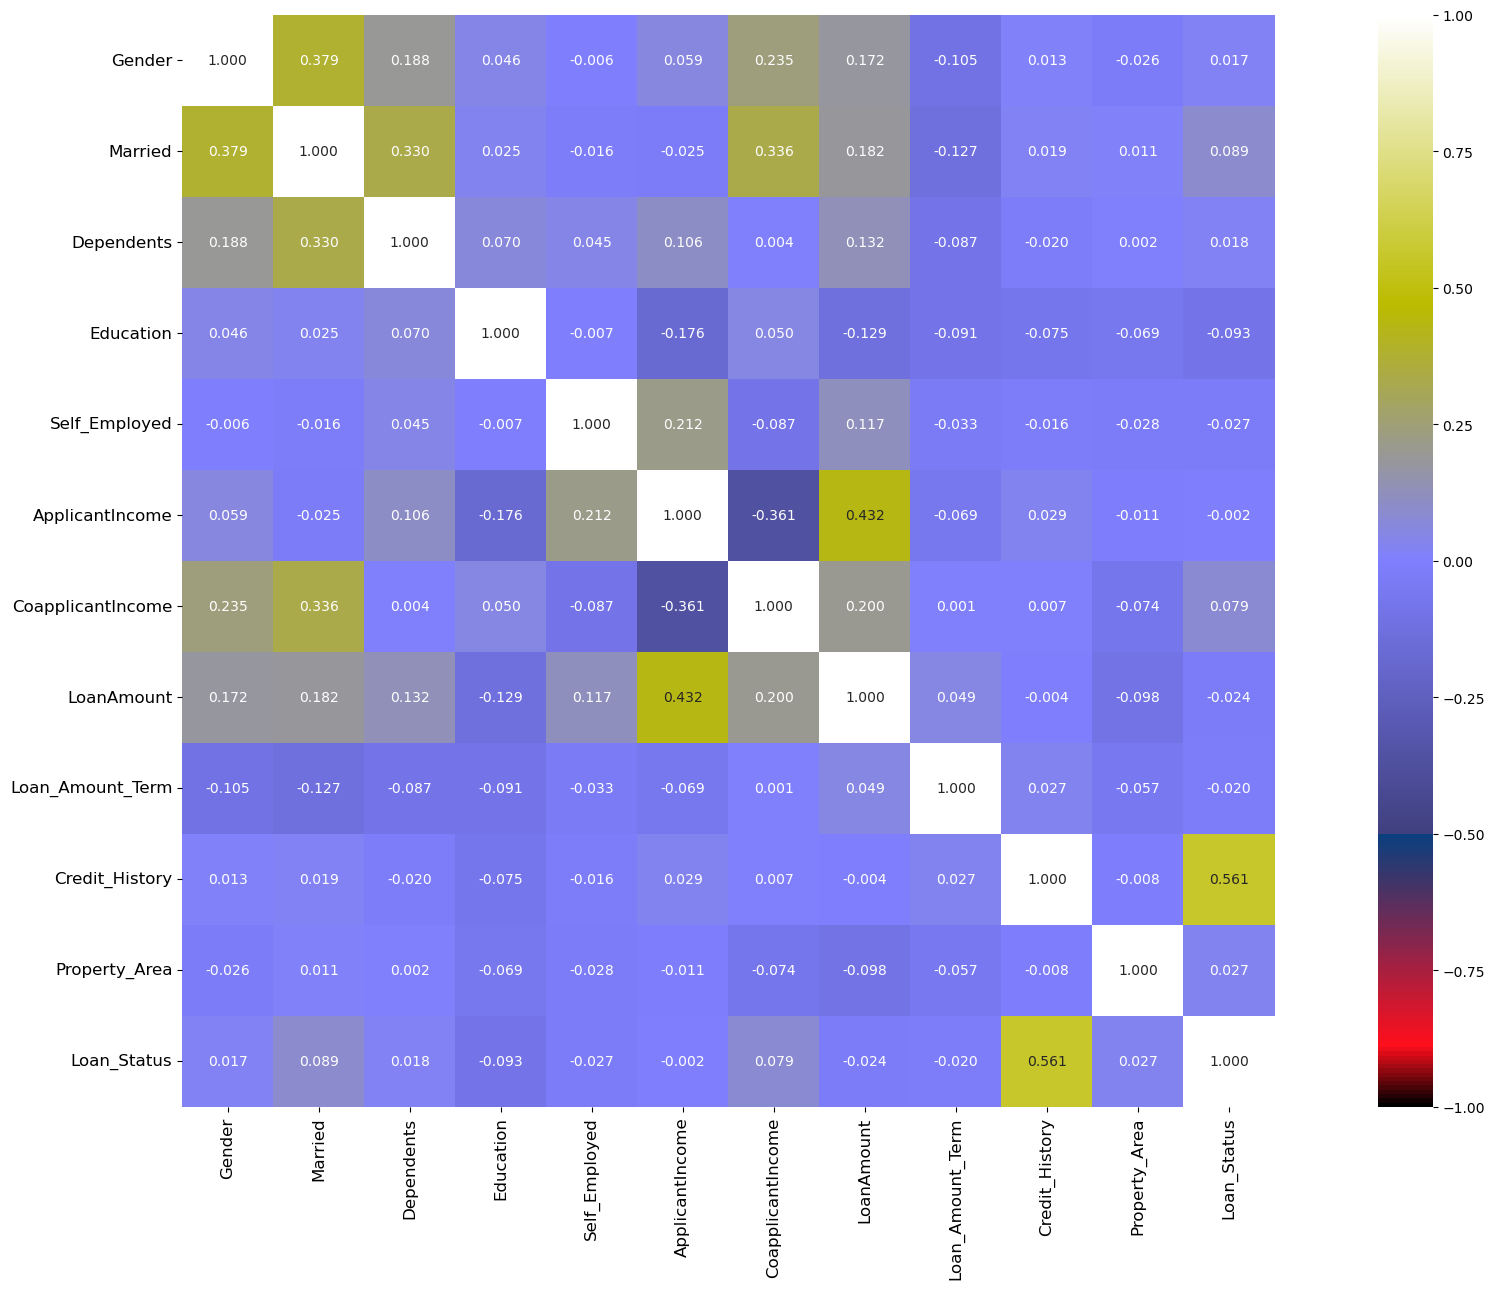

In [98]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


- As we can see that credit history has the highest impact on loan_status
- loan_amount and applicants_income also strongly related


Using variance inflation factor for multicollinearity
--


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif


,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


- since all VIF values are less than 10 so we need not to worry about multicollinearity


applying standard scaling
--

In [102]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']


from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


Building model
--



In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


     

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (403, 11)
Training target vector size: (403,)
Test feature matrix size: (174, 11)
Test target vector size: (174,)


logistic regression model
--


In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))


Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8333333333333334


Confusion matrix of Logistics Regression : 
 [[ 22  28]
 [  1 123]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.96      0.44      0.60        50
           1       0.81      0.99      0.89       124

    accuracy                           0.83       174
   macro avg       0.89      0.72      0.75       174
weighted avg       0.86      0.83      0.81       174



Optimal value of n_neighbors for KNN
--


In [106]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] 
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred)) 
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 0.59209349991676
RMSE value for k=  2 is: 0.5872202195147035
RMSE value for k=  3 is: 0.44849685092245223
RMSE value for k=  4 is: 0.5028653529707439
RMSE value for k=  5 is: 0.4288450139351179
RMSE value for k=  6 is: 0.4420433223684922
RMSE value for k=  7 is: 0.42209112705697793
RMSE value for k=  8 is: 0.4288450139351179
RMSE value for k=  9 is: 0.4288450139351179
RMSE value for k=  10 is: 0.42209112705697793
RMSE value for k=  11 is: 0.4288450139351179
RMSE value for k=  12 is: 0.42209112705697793
RMSE value for k=  13 is: 0.4288450139351179
RMSE value for k=  14 is: 0.42209112705697793
RMSE value for k=  15 is: 0.42209112705697793
RMSE value for k=  16 is: 0.41522739926869984
RMSE value for k=  17 is: 0.41522739926869984
RMSE value for k=  18 is: 0.408248290463863
RMSE value for k=  19 is: 0.41522739926869984
RMSE value for k=  20 is: 0.41522739926869984
RMSE value for k=  21 is: 0.41522739926869984
RMSE value for k=  22 is: 0.41522739926869984
RMSE value

applying other classification algorithm
--


Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8390804597701149


Confusion matrix : 
 [[ 23  27]
 [  1 123]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.46      0.62        50
           1       0.82      0.99      0.90       124

    accuracy                           0.84       174
   macro avg       0.89      0.73      0.76       174
weighted avg       0.86      0.84      0.82       174





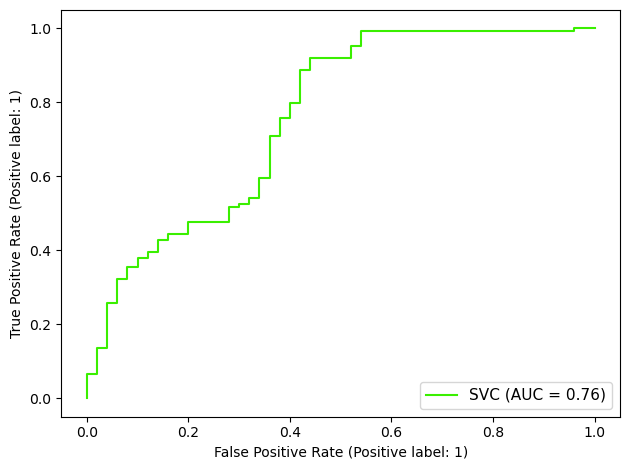

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8333333333333334


Confusion matrix : 
 [[ 22  28]
 [  1 123]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.44      0.60        50
           1       0.81      0.99      0.89       124

    accuracy                           0.83       174
   macro avg       0.89      0.72      0.75       174
weighted avg       0.86      0.83      0.81       174





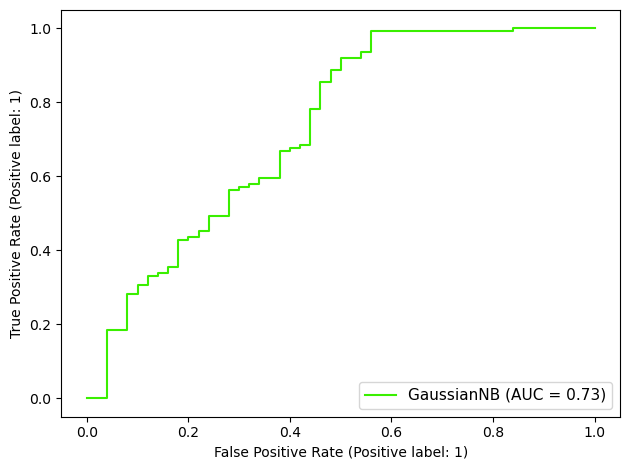

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7471264367816092


Confusion matrix : 
 [[32 18]
 [26 98]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.64      0.59        50
           1       0.84      0.79      0.82       124

    accuracy                           0.75       174
   macro avg       0.70      0.72      0.70       174
weighted avg       0.76      0.75      0.75       174





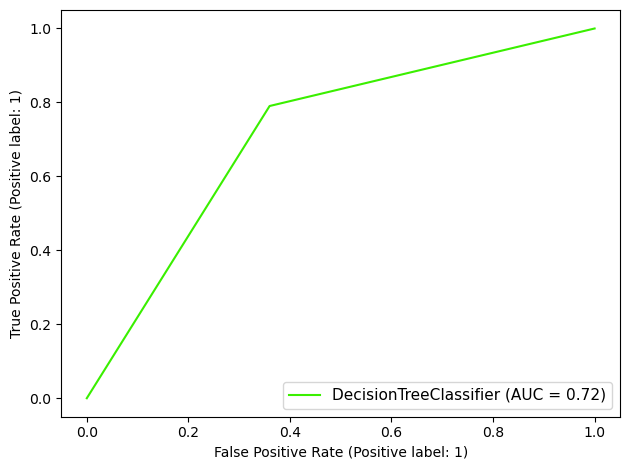

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7988505747126436


Confusion matrix : 
 [[ 22  28]
 [  7 117]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.44      0.56        50
           1       0.81      0.94      0.87       124

    accuracy                           0.80       174
   macro avg       0.78      0.69      0.71       174
weighted avg       0.79      0.80      0.78       174





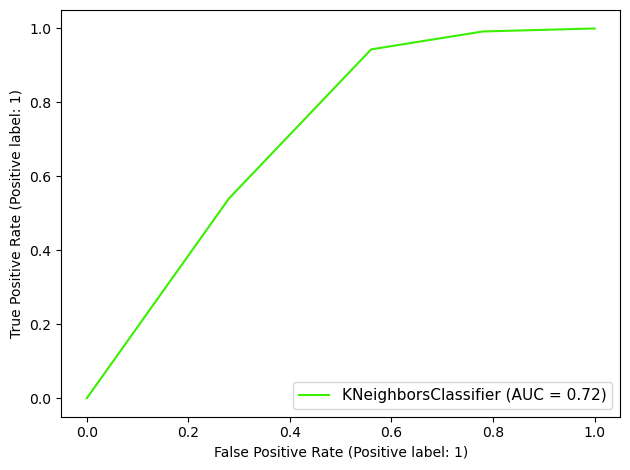

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8218390804597702


Confusion matrix : 
 [[ 26  24]
 [  7 117]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.52      0.63        50
           1       0.83      0.94      0.88       124

    accuracy                           0.82       174
   macro avg       0.81      0.73      0.75       174
weighted avg       0.82      0.82      0.81       174





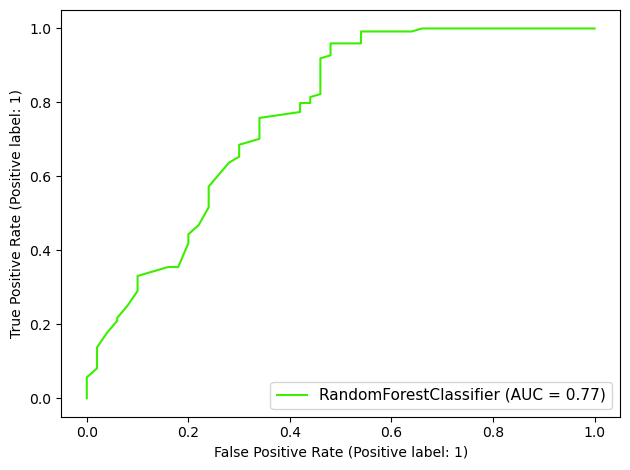

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.7873563218390804


Confusion matrix : 
 [[ 25  25]
 [ 12 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.50      0.57        50
           1       0.82      0.90      0.86       124

    accuracy                           0.79       174
   macro avg       0.75      0.70      0.72       174
weighted avg       0.78      0.79      0.78       174





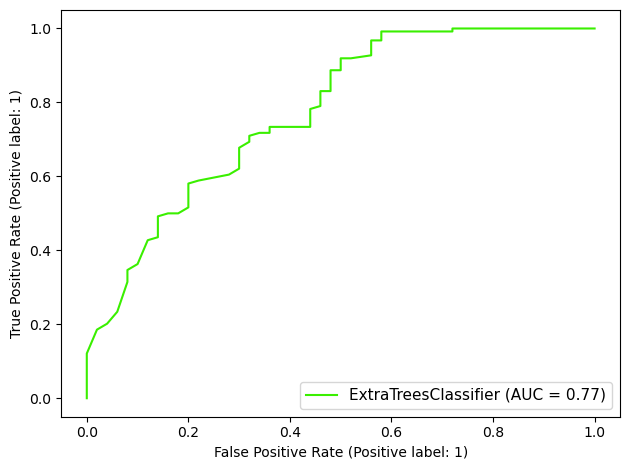

In [107]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')


Hyper paramenter tuning
--

In [108]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)


Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.815 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.827 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.741 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.775 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

Final model
--


In [109]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.8275862068965517


saving model
--

In [110]:
import joblib
joblib.dump(Final_mod,'loan_status.pkl')


['loan_status.pkl']